In [12]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy.spatial.distance import cdist
import pyvista as pv
import nibabel as nib
import pickle

In [ ]:
total_subjects=['sub1','sub2','sub3','sub4','sub5','sub6','sub7','sub8','sub9','sub10','sub11','sub12','sub13','sub14','sub15']

lefthemi_subjects = ['sub1','sub2','sub3','sub4','sub5','sub6','sub10','sub13','sub14','sub15']
righthemi_subjects = ['sub3','sub7','sub8','sub9','sub11','sub12']

colors = ["red", "darkblue", "green", "magenta", "purple", "pink", "skyblue","gold","brown","orange","lime","yellow","black","olive","darkorange"]
print(len(total_subjects))
freq_name = ['theta','alpha','beta','LG1','LG2','HG']


15


In [ ]:
r2_path="save_dir/"
left_vertex_index = []
left_data_list=[]
left_p_list=[]
for lh_subject in lefthemi_subjects:
    subject_index = total_subjects.index(lh_subject)
    print('lh ',lh_subject, end=' ')
    print(len(left_vertex_index),  end=' ')
    file_path ="freesurfer_coregi_badpop_radials/index_pkl/"+lh_subject+"_lh_fsaverageindex_badpop_radial.pkl"
    with open(file_path, 'rb') as f:
        indexs = pickle.load(f)
    file_path = r2_path + lh_subject +"_corr_r.pkl"
    with open(file_path, 'rb') as f:
        value = pickle.load(f)
    p_path = "save_dir/"+lh_subject+"_p_and_t.pkl"
    with open(p_path, 'rb') as f:
        pat_p_data_raw = pickle.load(f)
    pat_p_data = pat_p_data_raw[0][1,:,:,:,:]
    if lh_subject == "sub3":
        value = value[:,:,:,[40,41],:,:]
        pat_p_data = pat_p_data[:,:,[40,41],:]
    #print(value.shape)
    #print(len(indexs))
    left_data_list.append(value)
    left_p_list.append(pat_p_data)
    left_vertex_index += (indexs.tolist())
    print(len(left_vertex_index))

right_data_list=[]
right_vertex_index = []
right_p_list = []
for rh_subject in righthemi_subjects:
    print('rh '+rh_subject, end=' ')
    print(len(right_vertex_index),  end=' ')
    subject_index = total_subjects.index(rh_subject)
    file_path ="freesurfer_coregi_badpop_radials/index_pkl/"+rh_subject+"_rh_fsaverageindex_badpop_radial.pkl"
    with open(file_path, 'rb') as f:
        indexs = pickle.load(f)
    file_path = r2_path + rh_subject +"_corr_r.pkl"
    with open(file_path, 'rb') as f:
        value = pickle.load(f)
    p_path = "D:/semECoG/250125_r_r2/"+rh_subject+"_p_and_t.pkl"    
    with open(p_path, 'rb') as f:
        pat_p_data_raw = pickle.load(f)
    pat_p_data = pat_p_data_raw[0][1,:,:,:,:]
    if rh_subject == "sub3":
        good_ch = [ i for i in range(0,53) if i not in [40,41]]
        value = value[:,:,:,good_ch,:,:]
        pat_p_data = pat_p_data[:,:,good_ch,:]
    if rh_subject == "sub9":
        good_ch = [ i for i in range(0,23)]
        value = value[:,:,:,good_ch,:,:]
        pat_p_data = pat_p_data[:,:,good_ch,:]
    #print(value.shape)
    #print(len(indexs))
    right_data_list.append(value)
    right_p_list.append(pat_p_data)
    right_vertex_index += (indexs.tolist())
    print(len(right_vertex_index))

In [17]:
len(left_vertex_index)

442

In [ ]:
#load mesh 
root_path = 'freesurfer/freesurfer_output/'
#for visualization

fsaverage_pial_path_lh = root_path + 'fsaverage/surf/lh.pial'
fsaverage_pial_path_rh = root_path + 'fsaverage/surf/rh.pial'
fsaverage_inflated_path_lh = root_path + 'fsaverage/surf/lh.inflated'
fsaverage_inflated_path_rh = root_path + 'fsaverage/surf/rh.inflated'
fsaverage_flat_path_lh = root_path + 'fsaverage/surf/lh.flat'

In [19]:
threshold = 0.05 / (442+182) / 11 / 4
right_p = np.concatenate(right_p_list,axis=2)[:,5,:,:]
left_p = np.concatenate(left_p_list,axis=2)[:,5,:,:]
right_p_pass= np.where(right_p<threshold,1,0)
left_p_pass= np.where(left_p<threshold,1,0)

print(right_p.shape,left_p.shape)
print(np.sum(right_p_pass),np.sum(left_p_pass))

(4, 182, 11) (4, 442, 11)
3635 8906


In [ ]:
r_data_raw = np.concatenate(right_data_list,axis=3)[0,:,:,:,:,:]
l_data_raw = np.concatenate(left_data_list,axis=3)[0,:,:,:,:,:]
r_data =  np.transpose(np.mean(r_data_raw, axis=4), (2, 3, 0 ,1))
l_data = np.transpose(np.mean(l_data_raw, axis=4), (2, 3, 0 ,1)) # time, 4type, freq

In [ ]:
# only for HG

l_max_map_data = np.max(l_data[:,:,:,5],axis=1)
l_argmax_point_for_p = np.argmax(l_data[:,:,:,5],axis=1)
l_argmax_map_data = np.argmax(l_max_map_data,axis=1)
l_new_map_data = np.zeros((len(l_argmax_map_data),4))
for i in range(len(l_argmax_map_data)):
    if left_p_pass[l_argmax_map_data[i],i,l_argmax_point_for_p[i,l_argmax_map_data[i]]] == 1 :
        l_new_map_data[i,l_argmax_map_data[i]]=l_max_map_data[i,l_argmax_map_data[i]]

In [ ]:
# only for HG

r_max_map_data = np.max(r_data[:,:,:,5],axis=1)
r_argmax_point_for_p = np.argmax(r_data[:,:,:,5],axis=1)
r_argmax_map_data = np.argmax(r_max_map_data,axis=1)
r_new_map_data = np.zeros((len(r_argmax_map_data),4))
for i in range(len(r_argmax_map_data)):
    if right_p_pass[r_argmax_map_data[i],i,r_argmax_point_for_p[i,r_argmax_map_data[i]]] == 1 :
        r_new_map_data[i,r_argmax_map_data[i]]=r_max_map_data[i,r_argmax_map_data[i]]

In [23]:
print("left:")
print(np.sum(np.where(l_new_map_data[:,0]>0,1,0)))
print(np.sum(np.where(l_new_map_data[:,1]>0,1,0)))
print(np.sum(np.where(l_new_map_data[:,2]>0,1,0)))
print(np.sum(np.where(l_new_map_data[:,3]>0,1,0)))
print("right:")
print(np.sum(np.where(r_new_map_data[:,0]>0,1,0)))
print(np.sum(np.where(r_new_map_data[:,1]>0,1,0)))
print(np.sum(np.where(r_new_map_data[:,2]>0,1,0)))
print(np.sum(np.where(r_new_map_data[:,3]>0,1,0)))

left:
146
152
48
96
right:
70
57
21
34


In [24]:
left_bestmodel_index=[[],[],[],[]]
for i in range(4):
    model_boolean = np.where(l_new_map_data[:,i]>0,1,0)
    for k in range(len(model_boolean)):
        if model_boolean[k] ==1 :
            left_bestmodel_index[i].append(k)


right_bestmodel_index=[[],[],[],[]]
for i in range(4):
    model_boolean = np.where(r_new_map_data[:,i]>0,1,0)
    for k in range(len(model_boolean)):
        if model_boolean[k] ==1 :
            right_bestmodel_index[i].append(k)
        

In [25]:
for i in range(4):
    print(len(right_bestmodel_index[i]))

70
57
21
34


In [26]:
with open('left_bestmodel_index.pickle', 'wb') as f:
    pickle.dump(left_bestmodel_index, f, pickle.HIGHEST_PROTOCOL)

with open('right_bestmodel_index.pickle', 'wb') as f:
    pickle.dump(right_bestmodel_index, f, pickle.HIGHEST_PROTOCOL)

In [16]:
print(np.max(l_new_map_data[:,0]) , np.max(l_new_map_data[:,1]), np.max(l_new_map_data[:,2]), np.max(l_new_map_data[:,3]))
print(np.max(r_new_map_data[:,0]) , np.max(r_new_map_data[:,1]), np.max(r_new_map_data[:,2]), np.max(r_new_map_data[:,3]))

0.37899481750229247 0.34292514978786287 0.39154951475889493 0.6632280619483091
0.46814045873451676 0.3589879100899798 0.657240914888524 0.8841522960332607


In [17]:
with open('l_new_map_data.pkl', 'wb') as f:
    pickle.dump(l_new_map_data, f, pickle.HIGHEST_PROTOCOL)

with open('r_new_map_data.pkl', 'wb') as f:
    pickle.dump(r_new_map_data, f, pickle.HIGHEST_PROTOCOL)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [ ]:

import numpy as np

def cmapping(types, value, max_value):
    ratio = value / max_value
    rat1=0.3
    if types == 0:
        # Coral (white → coral)
        base_color = np.array([0.8, 0.4, 0.25])  # coral RGB
        color = np.ones(3) + (ratio+rat1)/(rat1+1) * (base_color - np.ones(3))
        r, g, b = color
        
    if types == 0:
        # red
        r = 1 - 0.2 * (ratio+rat1)/(rat1+1)
        g = 1 - (ratio+rat1)/(rat1+1)
        b = 1 - (ratio+rat1)/(rat1+1)
        
    if types == 1:
        # Greenish 
        r = 1 - (ratio+rat1)/(rat1+1)
        g = 1 - 0.2 * (ratio+rat1)/(rat1+1)
        b = 1 - (ratio+rat1)/(rat1+1)

    if types == 2:
        # Cyan (white → cyan)
        base_color = np.array([0.1, 0.50, 0.65])  # cyan RGB
        color = np.ones(3) + (ratio+rat1)/(rat1+1) * (base_color - np.ones(3))
        r, g, b = color
    
    if types == 3:
        # Magenta 
        r = 1 - 0.3 * (ratio+rat1)/(rat1+1)
        g = 1 - (ratio+rat1)/(rat1+1)
        b = 1 - 0.3 * (ratio+rat1)/(rat1+1)         

    return (r, g, b)
def sizemapping(value, max_value):
    ratio = value / max_value
    size = 0.08 + ratio * 0.24
    return size


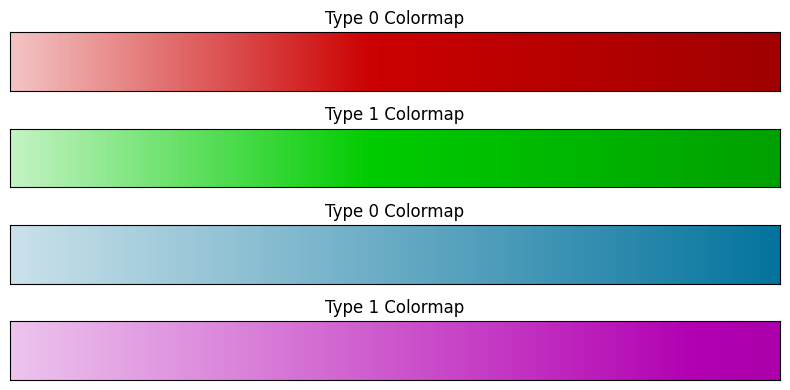

In [ ]:

def generate_cmap_for_type12(type_id, name):
    colors = [cmapping(type_id, r, 0.47) for r in np.linspace(0, 1, 256)]
    return LinearSegmentedColormap.from_list(name, colors)
def generate_cmap_for_type34(type_id, name):
    colors = [cmapping(type_id, r, 0.89) for r in np.linspace(0, 1, 256)]
    return LinearSegmentedColormap.from_list(name, colors)

cmaps12 = [generate_cmap_for_type12(t, f"type{t}_cmap") for t in range(2)]
cmaps34 = [generate_cmap_for_type34(t, f"type{t}_cmap") for t in range(2,4)]

fig, axes = plt.subplots(nrows=4, figsize=(8, 4))
x = np.linspace(0, 1, 256).reshape(1, -1)

for t in range(2):
    ax = axes[t]
    ax.imshow(x, aspect="auto", cmap=cmaps12[t])
    ax.set_title(f"Type {t} Colormap")
    ax.set_xticks([])
    ax.set_yticks([])
for t in range(2):
    ax = axes[t+2]
    ax.imshow(x, aspect="auto", cmap=cmaps34[t])
    ax.set_title(f"Type {t} Colormap")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

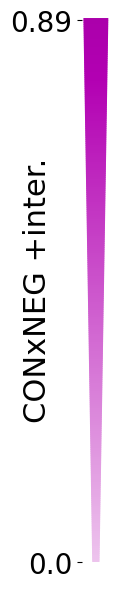

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# colormap 
x = np.linspace(0, 1, 256)
color_vals = x.reshape(-1, 1)


y = np.arange(len(x) + 1)

widths = np.linspace(0.25, 1.0, len(x) + 1)

# 좌우 x 경계 계산
X_left = -widths / 2
X_right = widths / 2
X = np.array([X_left, X_right]).T
Y = np.column_stack([y, y])


fig, ax = plt.subplots(figsize=(1.3, 6))


for i in range(len(x)):
    verts = [
        (X[i, 0], Y[i, 0]),
        (X[i + 1, 0], Y[i + 1, 0]),
        (X[i + 1, 1], Y[i + 1, 1]),
        (X[i, 1], Y[i, 1]),
    ]
    poly = plt.Polygon(verts, color=cmaps34[1](x[i]), edgecolor=None)
    ax.add_patch(poly)

# 테두리 없애기 ✅
for spine in ax.spines.values():
    spine.set_visible(False)


ax.set_xlim(-0.6, 0.6)
ax.set_ylim(0, len(x))
ax.set_yticks([0, 255])
ax.set_yticklabels(["0.0", "0.89"], fontsize=20)
ax.set_xticks([])
ax.set_ylabel("CONxNEG +inter.", fontsize=22, labelpad=-30)
ax.set_facecolor('white')

plt.tight_layout()
plt.savefig("CONNEGinterlabel_trapezoid_fat.png", dpi=300)
plt.show()


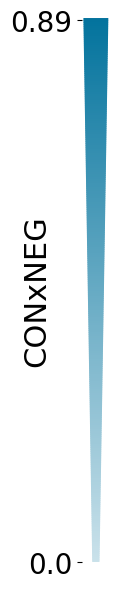

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0, 1, 256)
color_vals = x.reshape(-1, 1)

y = np.arange(len(x) + 1)


widths = np.linspace(0.25, 1.0, len(x) + 1)

X_left = -widths / 2
X_right = widths / 2
X = np.array([X_left, X_right]).T
Y = np.column_stack([y, y])

fig, ax = plt.subplots(figsize=(1.3, 6))


for i in range(len(x)):
    verts = [
        (X[i, 0], Y[i, 0]),
        (X[i + 1, 0], Y[i + 1, 0]),
        (X[i + 1, 1], Y[i + 1, 1]),
        (X[i, 1], Y[i, 1]),
    ]
    poly = plt.Polygon(verts, color=cmaps34[0](x[i]), edgecolor=None)
    ax.add_patch(poly)

for spine in ax.spines.values():
    spine.set_visible(False)


ax.set_xlim(-0.6, 0.6)
ax.set_ylim(0, len(x))
ax.set_yticks([0, 255])
ax.set_yticklabels(["0.0", "0.89"], fontsize=20)
ax.set_xticks([])
ax.set_ylabel("CONxNEG", fontsize=22, labelpad=-30)
ax.set_facecolor('white')

plt.tight_layout()
plt.savefig("CONNEGlabel_trapezoid_fat.png", dpi=300)
plt.show()

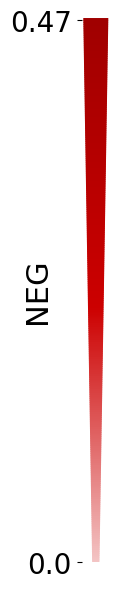

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0, 1, 256)
color_vals = x.reshape(-1, 1)


y = np.arange(len(x) + 1)


widths = np.linspace(0.25, 1.0, len(x) + 1)

X_left = -widths / 2
X_right = widths / 2
X = np.array([X_left, X_right]).T
Y = np.column_stack([y, y])

fig, ax = plt.subplots(figsize=(1.3, 6))


for i in range(len(x)):
    verts = [
        (X[i, 0], Y[i, 0]),
        (X[i + 1, 0], Y[i + 1, 0]),
        (X[i + 1, 1], Y[i + 1, 1]),
        (X[i, 1], Y[i, 1]),
    ]
    poly = plt.Polygon(verts, color=cmaps12[0](x[i]), edgecolor=None)
    ax.add_patch(poly)

for spine in ax.spines.values():
    spine.set_visible(False)


ax.set_xlim(-0.6, 0.6)
ax.set_ylim(0, len(x))
ax.set_yticks([0, 255])
ax.set_yticklabels(["0.0", "0.47"], fontsize=20)
ax.set_xticks([])
ax.set_ylabel("NEG", fontsize=22, labelpad=-30)
ax.set_facecolor('white')

plt.tight_layout()
plt.savefig("NEGlabel_trapezoid_fat.png", dpi=300)
plt.show()

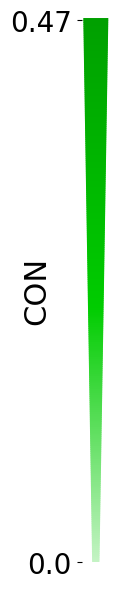

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0, 1, 256)
color_vals = x.reshape(-1, 1)


y = np.arange(len(x) + 1)

widths = np.linspace(0.25, 1.0, len(x) + 1)


X_left = -widths / 2
X_right = widths / 2
X = np.array([X_left, X_right]).T
Y = np.column_stack([y, y])


fig, ax = plt.subplots(figsize=(1.3, 6))


for i in range(len(x)):
    verts = [
        (X[i, 0], Y[i, 0]),
        (X[i + 1, 0], Y[i + 1, 0]),
        (X[i + 1, 1], Y[i + 1, 1]),
        (X[i, 1], Y[i, 1]),
    ]
    poly = plt.Polygon(verts, color=cmaps12[1](x[i]), edgecolor=None)
    ax.add_patch(poly)


for spine in ax.spines.values():
    spine.set_visible(False)


ax.set_xlim(-0.6, 0.6)
ax.set_ylim(0, len(x))
ax.set_yticks([0, 255])
ax.set_yticklabels(["0.0", "0.47"], fontsize=20)
ax.set_xticks([])
ax.set_ylabel("CON", fontsize=22, labelpad=-30)
ax.set_facecolor('white')

plt.tight_layout()
plt.savefig("CONlabel_trapezoid_fat.png", dpi=300)
plt.show()

C:\Users\yirye\AppData\Local\Temp\ipykernel_26348\562357992.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


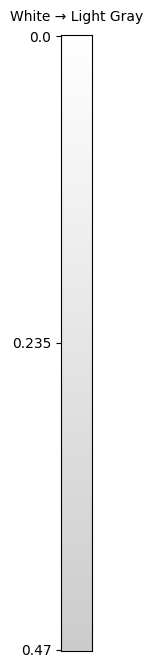

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


colors = [(1, 1, 1), (0.80, 0.80, 0.80)]

custom_gray = LinearSegmentedColormap.from_list("whitetogray", colors)

x = np.linspace(0, 1, 256).reshape(-1, 1)  # (256, 1)로 reshape해서 세로

plt.figure(figsize=(0.4, 8))  # 세로로 긴 플롯
plt.imshow(x, aspect="auto", cmap=custom_gray)
plt.yticks(np.linspace(0, 255, 3), labels=["0.0", "0.235","0.47"])
plt.xticks([])
plt.title("White → Light Gray", fontsize=10, pad=10)
plt.tight_layout()
plt.show()

In [141]:
[np.argmax(r_new_map_data[:,0]), np.argmax(r_new_map_data[:,1]),np.argmax(r_new_map_data[:,2]),np.argmax(r_new_map_data[:,3])]

[131, 108, 114, 113]

In [142]:
[np.argmax(l_new_map_data[:,0]), np.argmax(l_new_map_data[:,1]),np.argmax(l_new_map_data[:,2]),np.argmax(l_new_map_data[:,3])]

[93, 282, 324, 47]

In [143]:
[np.max(r_new_map_data[:,0]), np.max(r_new_map_data[:,1]),np.max(r_new_map_data[:,2]),np.max(r_new_map_data[:,3])]

[0.46814045873451676,
 0.3589879100899798,
 0.657240914888524,
 0.8841522960332607]

In [144]:
[np.max(l_new_map_data[:,0]), np.max(l_new_map_data[:,1]),np.max(l_new_map_data[:,2]),np.max(l_new_map_data[:,3])]

[0.37899481750229247,
 0.34292514978786287,
 0.39154951475889493,
 0.6632280619483091]

In [113]:
print(np.max(l_new_map_data[:,0]), np.max(r_new_map_data[:,0]))
print(np.max(l_new_map_data[:,1]), np.max(r_new_map_data[:,1]))
print(np.max(l_new_map_data[:,2]), np.max(r_new_map_data[:,2]))
print(np.max(l_new_map_data[:,3]), np.max(r_new_map_data[:,3]))

0.37899481750229247 0.46814045873451676
0.34292514978786287 0.3589879100899798
0.39154951475889493 0.657240914888524
0.6632280619483091 0.8841522960332607


(0.001, 0.9283599108349238)

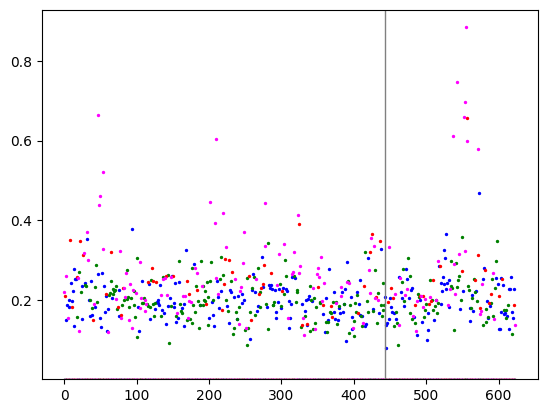

In [108]:

plt.scatter(np.arange(len(l_new_map_data)+len(r_new_map_data)),l_new_map_data[:,0].tolist()+r_new_map_data[:,0].tolist(),c='blue',s=2)
plt.scatter(np.arange(len(l_new_map_data)+len(r_new_map_data)),l_new_map_data[:,1].tolist()+r_new_map_data[:,1].tolist(),c='green',s=2)
plt.scatter(np.arange(len(l_new_map_data)+len(r_new_map_data)),l_new_map_data[:,2].tolist()+r_new_map_data[:,2].tolist(),c='red',s=2)
plt.scatter(np.arange(len(l_new_map_data)+len(r_new_map_data)),l_new_map_data[:,3].tolist()+r_new_map_data[:,3].tolist(),c='magenta',s=2)
plt.axvline(len(l_new_map_data)+0.5, c='gray', linewidth=1)
plt.ylim(0.001,None)

In [ ]:

Brain = mne.viz.get_brain_class()

subjects_dir = mne.datasets.sample.data_path() / "subjects"

mne.datasets.fetch_hcp_mmp_parcellation(subjects_dir=subjects_dir, verbose=True)

mne.datasets.fetch_aparc_sub_parcellation(subjects_dir=subjects_dir, verbose=True)

labels = mne.read_labels_from_annot(
    "fsaverage", "HCPMMP1", "lh", subjects_dir=subjects_dir
)
plotter = pv.Plotter()
brain = Brain(
    "fsaverage",
    "lh",
    "inflated",
    subjects_dir=subjects_dir,
    cortex={
    "colormap": custom_gray,   # 또는 matplotlib colormap 객체
    "vmin": -2,           # sulc 값 최소
    "vmax": 2,            # sulc 값 최대
    },
    background="white",
    size=(1200, 800),
)

etc_index=[]
for i in range(len(left_vertex_index)):
    if i%100 ==0:
        print(i, end = '  ')
    ch_types = l_argmax_map_data[i]
    value = l_new_map_data[i,ch_types]
    if ch_types in [0,1]:
        brain.add_foci(left_vertex_index[i], hemi="lh", coords_as_verts=True, color=cmapping(ch_types,value,0.47), scale_factor=sizemapping(value,0.47))
    else:
        etc_index.append(i)
brain.add_foci(np.array(left_vertex_index)[etc_index], hemi="lh", coords_as_verts=True, color=(1,1,1), scale_factor=0.08)


Reading labels from parcellation...
   read 181 labels from C:\Users\yirye\mne_data\MNE-sample-data\subjects\fsaverage\label\lh.HCPMMP1.annot


0  100  200  300  400  

In [ ]:

Brain = mne.viz.get_brain_class()

subjects_dir = mne.datasets.sample.data_path() / "subjects"

mne.datasets.fetch_hcp_mmp_parcellation(subjects_dir=subjects_dir, verbose=True)

mne.datasets.fetch_aparc_sub_parcellation(subjects_dir=subjects_dir, verbose=True)

labels = mne.read_labels_from_annot(
    "fsaverage", "HCPMMP1", "lh", subjects_dir=subjects_dir
)
plotter = pv.Plotter()
brain = Brain(
    "fsaverage",
    "rh",
    "inflated",
    subjects_dir=subjects_dir,
    cortex={
    "colormap": custom_gray,   # 또는 matplotlib colormap 객체
    "vmin": -2,           # sulc 값 최소
    "vmax": 2,            # sulc 값 최대
    },
    background="white",
    size=(1200, 800),
)

r_etc_index=[]
for i in range(len(right_vertex_index)):
    if i%100 ==0:
        print(i, end = '  ')
    ch_types = r_argmax_map_data[i]
    value = r_new_map_data[i,ch_types]
    if ch_types in [0,1]:
        brain.add_foci(right_vertex_index[i], hemi="rh", coords_as_verts=True, color=cmapping(ch_types,value,0.47), scale_factor=sizemapping(value,0.47))
    else:
        r_etc_index.append(i)
brain.add_foci(np.array(right_vertex_index)[r_etc_index], hemi="rh", coords_as_verts=True, color=(1,1,1), scale_factor=0.08)

Reading labels from parcellation...
   read 181 labels from C:\Users\yirye\mne_data\MNE-sample-data\subjects\fsaverage\label\lh.HCPMMP1.annot


0  100  

In [ ]:

Brain = mne.viz.get_brain_class()

subjects_dir = mne.datasets.sample.data_path() / "subjects"

mne.datasets.fetch_hcp_mmp_parcellation(subjects_dir=subjects_dir, verbose=True)

mne.datasets.fetch_aparc_sub_parcellation(subjects_dir=subjects_dir, verbose=True)

labels = mne.read_labels_from_annot(
    "fsaverage", "HCPMMP1", "lh", subjects_dir=subjects_dir
)
plotter = pv.Plotter()
brain = Brain(
    "fsaverage",
    "lh",
    "inflated",
    subjects_dir=subjects_dir,
    cortex={
    "colormap": custom_gray,   # 또는 matplotlib colormap 객체
    "vmin": -2,           # sulc 값 최소
    "vmax": 2,            # sulc 값 최대
    },
    background="white",
    size=(1200, 800),
)
#brain.add_annotation("HCPMMP1")
lh_labels_aparc_sub= mne.read_labels_from_annot(
    "fsaverage",'aparc_sub', "lh", subjects_dir=subjects_dir
)
aud_label = [label for label in lh_labels_aparc_sub if label.name in  ['superiortemporal_1-lh','superiortemporal_2-lh','superiortemporal_3-lh','superiortemporal_4-lh','superiortemporal_5-lh','superiortemporal_6-lh']]
for label in aud_label:
    brain.add_label(label, color=(0.5, 0.5, 0.5), alpha=0.4, borders=False)

etc_index=[]
for i in range(len(left_vertex_index)):
    if i%100 ==0:
        print(i, end = '  ')
    ch_types = l_argmax_map_data[i]
    value = l_new_map_data[i,ch_types]
    if ch_types in [2,3]:
        #brain.add_foci(left_vertex_index[i], hemi="lh", coords_as_verts=True, color=cmapping(ch_types,value,0.89), scale_factor=sizemapping(value,0.89))
        brain.add_foci(left_vertex_index[i], hemi="lh", coords_as_verts=True, color=cmapping(ch_types,value,0.89), scale_factor=sizemapping(value,0.89))
    else:
        etc_index.append(i)
brain.add_foci(np.array(left_vertex_index)[etc_index], hemi="lh", coords_as_verts=True, color=(1,1,1), scale_factor=0.08)

Reading labels from parcellation...
   read 181 labels from C:\Users\yirye\mne_data\MNE-sample-data\subjects\fsaverage\label\lh.HCPMMP1.annot


Reading labels from parcellation...
   read 226 labels from C:\Users\yirye\mne_data\MNE-sample-data\subjects\fsaverage\label\lh.aparc_sub.annot
0  100  200  300  400  

In [104]:
# type 1, 2
Brain = mne.viz.get_brain_class()

subjects_dir = mne.datasets.sample.data_path() / "subjects"

mne.datasets.fetch_hcp_mmp_parcellation(subjects_dir=subjects_dir, verbose=True)

mne.datasets.fetch_aparc_sub_parcellation(subjects_dir=subjects_dir, verbose=True)

labels = mne.read_labels_from_annot(
    "fsaverage", "HCPMMP1", "lh", subjects_dir=subjects_dir
)
plotter = pv.Plotter()
brain = Brain(
    "fsaverage",
    "lh",
    "inflated",
    subjects_dir=subjects_dir,
    cortex={
    "colormap": custom_gray,   # 또는 matplotlib colormap 객체
    "vmin": -2,           # sulc 값 최소
    "vmax": 2,            # sulc 값 최대
    },
    background="white",
    size=(1200, 800),
)
#brain.add_annotation("HCPMMP1")

etc_index=[]
for i in range(len(left_vertex_index)):
    if i%100 ==0:
        print(i, end = '  ')
    ch_types = l_argmax_map_data[i]
    value = l_new_map_data[i,ch_types]
    if ch_types in [3]:
        brain.add_foci(left_vertex_index[i], hemi="lh", coords_as_verts=True, color=cmapping(ch_types,value,0.89), scale_factor=sizemapping(value,0.89))
    else:
        etc_index.append(i)
brain.add_foci(np.array(left_vertex_index)[etc_index], hemi="lh", coords_as_verts=True, color=(0.45,0.45,0.45), scale_factor=0.08)

Reading labels from parcellation...
   read 181 labels from C:\Users\yirye\mne_data\MNE-sample-data\subjects\fsaverage\label\lh.HCPMMP1.annot


0  100  200  300  400  

In [26]:
# type 1, 2
Brain = mne.viz.get_brain_class()

subjects_dir = mne.datasets.sample.data_path() / "subjects"

mne.datasets.fetch_hcp_mmp_parcellation(subjects_dir=subjects_dir, verbose=True)

mne.datasets.fetch_aparc_sub_parcellation(subjects_dir=subjects_dir, verbose=True)

labels = mne.read_labels_from_annot(
    "fsaverage", "aparc_sub", "lh", subjects_dir=subjects_dir
)
plotter = pv.Plotter()
brain = Brain(
    "fsaverage",
    "lh",
    "inflated",
    subjects_dir=subjects_dir,
    cortex="low_contrast",
    background="white",
    size=(800, 600),
)
brain.add_annotation("aparc_sub")

etc_index=[]
for i in range(len(left_vertex_index)):
    if i%100 ==0:
        print(i, end = '  ')
    ch_types = l_argmax_map_data[i]
    value = l_new_map_data[i,ch_types]
    if ch_types in [2,3]:
        brain.add_foci(left_vertex_index[i], hemi="lh", coords_as_verts=True, color=cmapping(ch_types,value,0.89), scale_factor=sizemapping(value,0.89))
    else:
        etc_index.append(i)
brain.add_foci(np.array(left_vertex_index)[etc_index], hemi="lh", coords_as_verts=True, color=(1,1,1), scale_factor=0.1)

Reading labels from parcellation...
   read 226 labels from C:\Users\yirye\mne_data\MNE-sample-data\subjects\fsaverage\label\lh.aparc_sub.annot


0  100  200  300  400  

In [105]:
# type 1, 2
Brain = mne.viz.get_brain_class()

subjects_dir = mne.datasets.sample.data_path() / "subjects"

mne.datasets.fetch_hcp_mmp_parcellation(subjects_dir=subjects_dir, verbose=True)

mne.datasets.fetch_aparc_sub_parcellation(subjects_dir=subjects_dir, verbose=True)

labels = mne.read_labels_from_annot(
    "fsaverage", "HCPMMP1", "lh", subjects_dir=subjects_dir
)
plotter = pv.Plotter()
brain = Brain(
    "fsaverage",
    "rh",
    "inflated",
    subjects_dir=subjects_dir,
    cortex={
    "colormap": custom_gray,  
    "vmin": -2,           
    "vmax": 2,            
    },
    background="white",
    size=(1200, 800),
)

r_etc_index=[]
for i in range(len(right_vertex_index)):
    if i%100 ==0:
        print(i, end = '  ')
    ch_types = r_argmax_map_data[i]
    value = r_new_map_data[i,ch_types]
    if ch_types in [2,3]:
        brain.add_foci(right_vertex_index[i], hemi="rh", coords_as_verts=True, color=cmapping(ch_types,value,0.89), scale_factor=sizemapping(value,0.89))
    else:
        r_etc_index.append(i)
brain.add_foci(np.array(right_vertex_index)[r_etc_index], hemi="rh", coords_as_verts=True, color=(1,1,1), scale_factor=0.08)

Reading labels from parcellation...
   read 181 labels from C:\Users\yirye\mne_data\MNE-sample-data\subjects\fsaverage\label\lh.HCPMMP1.annot


0  100  